# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [52]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [53]:
df = pd.DataFrame()
df["reviews"] = reviews
df.tail()

,reviews
995,✅ Trip Verified | The first part from Brussel...
996,✅ Trip Verified | Stockholm to London. Worst ...
997,✅ Trip Verified | Seems like no one was aware ...
998,✅ Trip Verified | Premium economy don’t waste ...
999,✅ Trip Verified | Lisbon to London. Business ...


In [54]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [55]:
# Save the DataFrame to a CSV file in the 'data' folder
df.to_csv("data/BA_reviews.csv", index=False)

# Confirm the file is saved
print("Data saved to 'data/BA_reviews.csv'")


Data saved to 'data/BA_reviews.csv'


In [56]:
!pip install pandas nltk matplotlib wordcloud sklearn vaderSentiment


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [57]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("data/BA_reviews.csv")

# Drop rows with missing reviews
df.dropna(subset=['reviews'], inplace=True)

# Define a function to clean the text but keep the "✅" symbol
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation, but keep "✅"
    text = re.sub(r"[^a-zA-Z\s✅]", "", text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply cleaning to the 'reviews' column
df['Cleaned_Review'] = df['reviews'].apply(clean_text)

# Check the cleaned data to ensure "✅" is retained
df[['reviews', 'Cleaned_Review']].head()


,reviews,Cleaned_Review
0,✅ Trip Verified | I recently flew from New Y...,✅ trip verified i recently flew from new york ...
1,Not Verified | BA business class in Europe h...,not verified ba business class in europe has a...
2,✅ Trip Verified | Our flight started in Seattl...,✅ trip verified our flight started in seattle ...
3,✅ Trip Verified | British Airways Flight fro...,✅ trip verified british airways flight from ed...
4,✅ Trip Verified | British Airways World Trav...,✅ trip verified british airways world travelle...


In [58]:
df['Cleaned_Review']

0      ✅ trip verified i recently flew from new york ...
1      not verified ba business class in europe has a...
2      ✅ trip verified our flight started in seattle ...
3      ✅ trip verified british airways flight from ed...
4      ✅ trip verified british airways world travelle...
                             ...                        
995    ✅ trip verified the first part from brussels t...
996    ✅ trip verified stockholm to london worst busi...
997    ✅ trip verified seems like no one was aware of...
998    ✅ trip verified premium economy dont waste you...
999    ✅ trip verified lisbon to london business clas...
Name: Cleaned_Review, Length: 1000, dtype: object

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # The compound score represents the overall sentiment

# Apply sentiment analysis to the 'Cleaned_Review' column
df['Sentiment_Score'] = df['Cleaned_Review'].apply(get_sentiment)

# Classify sentiment as Positive, Neutral, or Negative based on the compound score
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Check the sentiment analysis results
print(df[['Cleaned_Review', 'Sentiment_Score', 'Sentiment_Label']].head())

# Optionally, save the results to a new CSV file
df.to_csv('data/BA_reviews_with_sentiment.csv', index=False)


                                      Cleaned_Review  Sentiment_Score  \
0  ✅ trip verified i recently flew from new york ...           0.9827   
1  not verified ba business class in europe has a...          -0.2514   
2  ✅ trip verified our flight started in seattle ...           0.3514   
3  ✅ trip verified british airways flight from ed...          -0.7535   
4  ✅ trip verified british airways world travelle...           0.9747   

  Sentiment_Label  
0        Positive  
1        Negative  
2        Positive  
3        Negative  
4        Positive  


In [60]:
df['Sentiment_Label']

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
995    Positive
996    Negative
997    Negative
998    Positive
999    Negative
Name: Sentiment_Label, Length: 1000, dtype: object

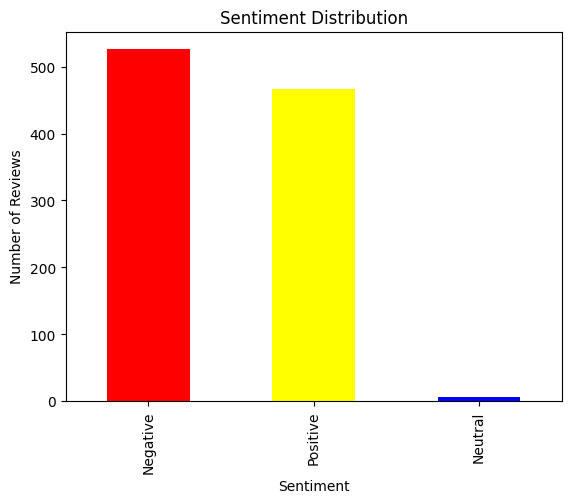

In [61]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sentiment_distribution = df['Sentiment_Label'].value_counts()
sentiment_distribution.plot(kind='bar', color=['red', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [62]:

# Get the distribution of sentiment labels
sentiment_distribution = df['Sentiment_Label'].value_counts()

# Display the distribution
print(sentiment_distribution)


Sentiment_Label
Negative    526
Positive    467
Neutral       7
Name: count, dtype: int64


In [63]:
!pip install WordCloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Maniesh M\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


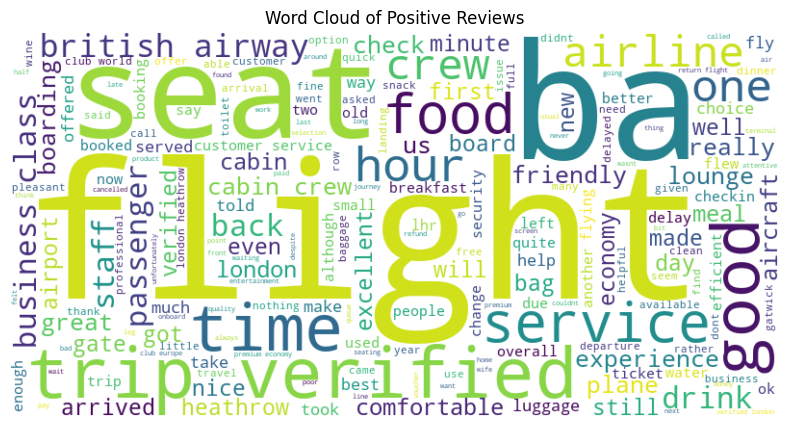

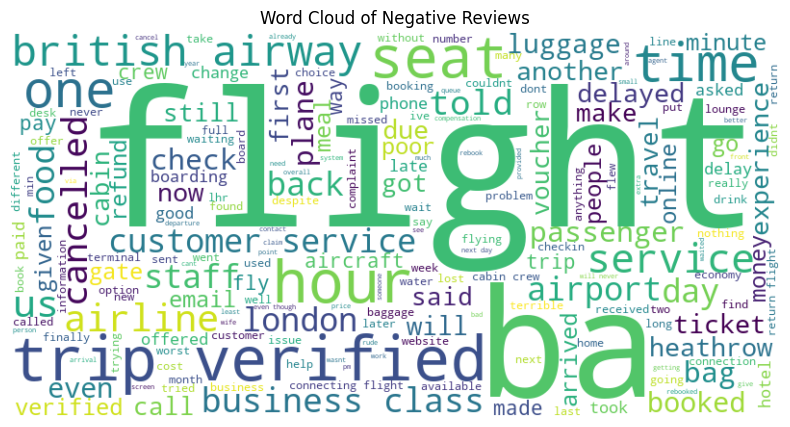

In [64]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment_Label'] == 'Positive']['Cleaned_Review'])
negative_reviews = ' '.join(df[df['Sentiment_Label'] == 'Negative']['Cleaned_Review'])

# Positive review word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

# Negative review word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()


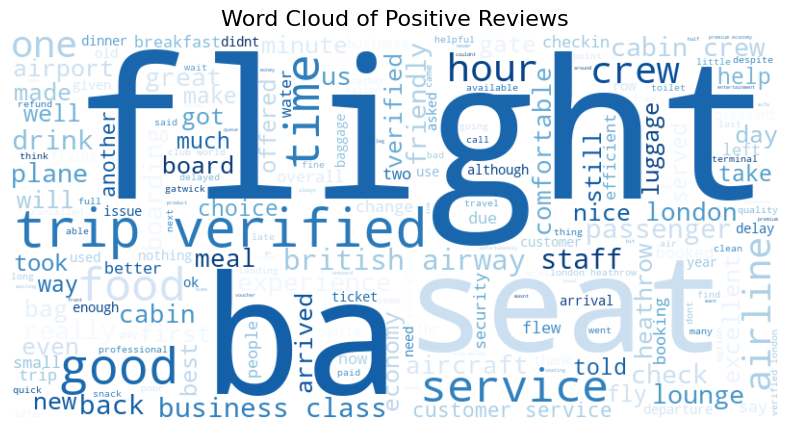

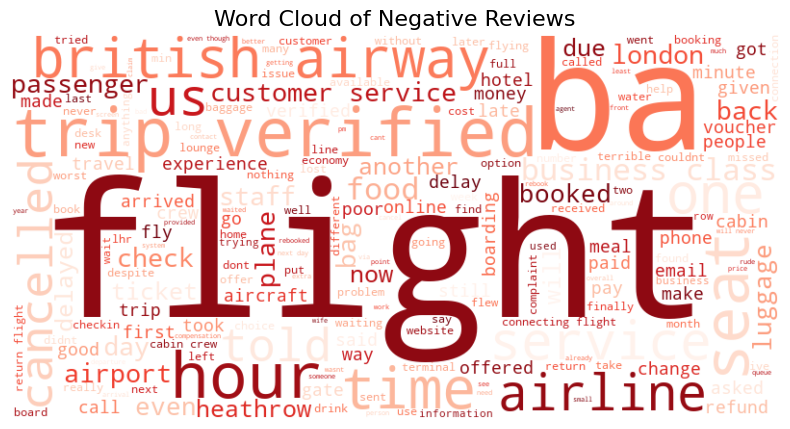

In [65]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment_Label'] == 'Positive']['Cleaned_Review'])
negative_reviews = ' '.join(df[df['Sentiment_Label'] == 'Negative']['Cleaned_Review'])

# Generate word cloud for positive reviews with a "Blues" color scheme
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_reviews)

# Generate word cloud for negative reviews with a "Reds" color scheme
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews", fontsize=16)
plt.show()

# Plot word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews", fontsize=16)
plt.show()
